# Корреляции Correlations

In [2]:
import pandas as pd #import the required libraries
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/vehicles_dataset_upd.csv') #read the data from the dataset
df.head()                                         #and display the first 5 rows

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


Target variable - price_category. This is a categorical variable. 
One way to check the correlation between a categorical variable and a numeric variable is to plot a set of distributions on the same plot.
We will look at the dependence price_category on the miles traveled (odometer)

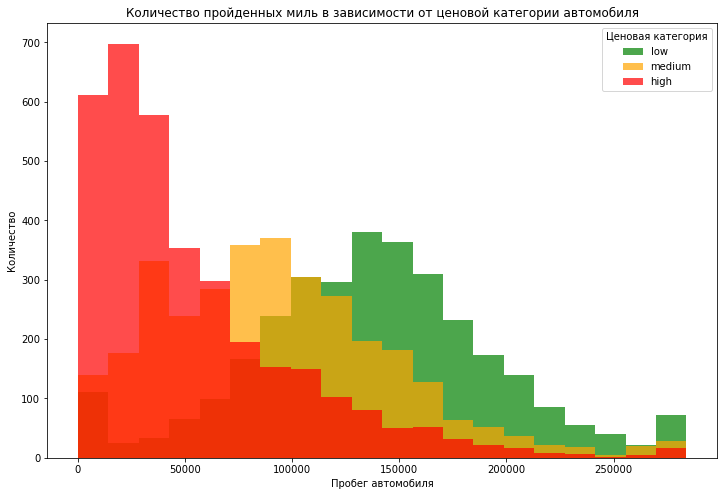

In [10]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'} #Colors of price_category

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df[df['price_category'] == price_category]

    ax.hist(data['odometer'], bins=20, color=color, alpha=0.7)
    
plt.ylabel('Количество')
plt.xlabel('Пробег автомобиля')
plt.title('Количество пройденных миль в зависимости от ценовой категории автомобиля')
plt.legend(colors, title="Ценовая категория");

In [ ]:
Dependence of mileage on the year of manufacture of the car

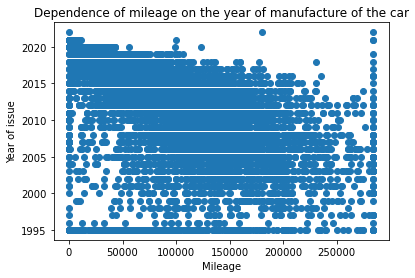

In [13]:
plt.figure()
plt.scatter(df['odometer'], df['year'])
plt.title("Dependence of mileage on the year of manufacture of the car")#Зависимость пробега от года выпуска автомобиля
plt.xlabel('Mileage')#Пробег
plt.ylabel('Year of issue')#Год выпуска

plt.show();

In [ ]:
Dependence of mileage on the year of manufacture of the car by price categories

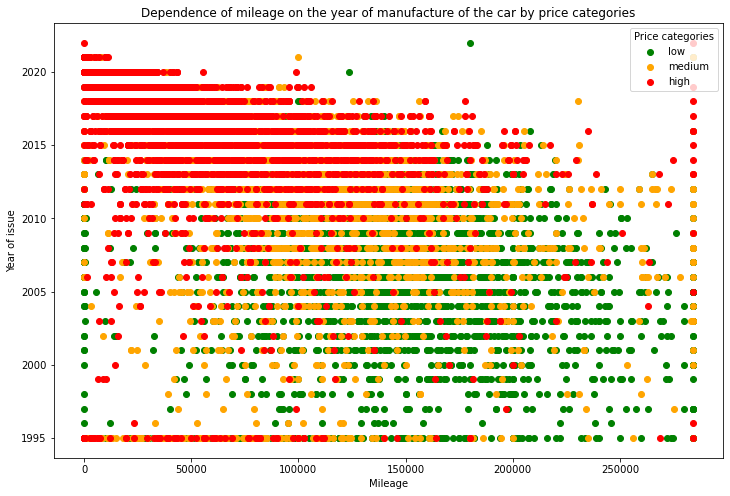

In [14]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df[df['price_category'] == price_category]

    ax.scatter(data['odometer'], data['year'], c=color, label=price_category)

ax.legend(loc='upper right', title="Price categories")#Ценовая категория
plt.title("Dependence of mileage on the year of manufacture of the car by price categories")#Зависимость пробега от года выпуска автомобиля
plt.xlabel('Mileage')#Пробег
plt.ylabel('Year of issue')#Год выпуска
plt.show()

In [6]:
df['year'].corr(df['odometer']) #Pearson correlation coefficient
#minus allows you to say that the correlation between the year of manufacture 
#and mileage is really negative.
#And value of 0.5 says that it is weak.

-0.5087961565425962

In [15]:
df.corr() #call the Pearson correlation over the entire dataframe
#as you can see, there is no high correlation here

,id,price,year,odometer,lat,long
id,1.000000,-0.032689,-0.100205,0.048796,-0.077752,-0.106567
price,-0.032689,1.000000,0.072763,-0.057455,0.002235,-0.001371
year,-0.100205,0.072763,1.000000,-0.508796,-0.031854,0.007378
odometer,0.048796,-0.057455,-0.508796,1.000000,0.024401,0.007551
lat,-0.077752,0.002235,-0.031854,0.024401,1.000000,-0.164737
long,-0.106567,-0.001371,0.007378,0.007551,-0.164737,1.000000


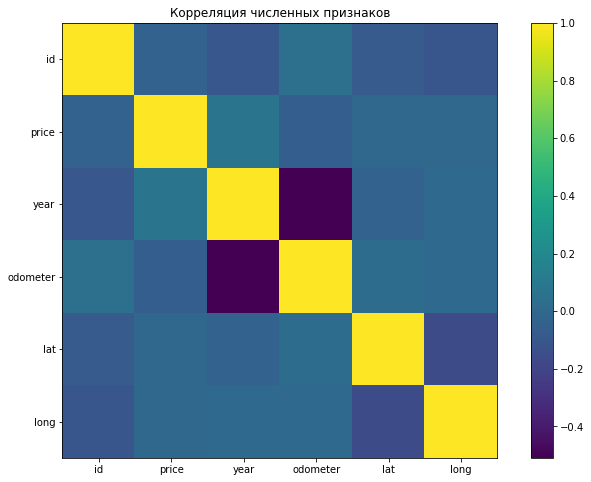

In [17]:
plt.figure(figsize=(12, 8))

columns = df.corr().columns.tolist()
plt.imshow(df.corr()) #builds a graph as an image (hit map).

plt.title("Корреляция численных признаков")
plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()